### Import Packages

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv(r"D:\Data Mining\Data sets for lab report\Credit card for practical practise\credit_card_customer_data.csv")

In [45]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [47]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [49]:
data.duplicated().sum()

0

In [51]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


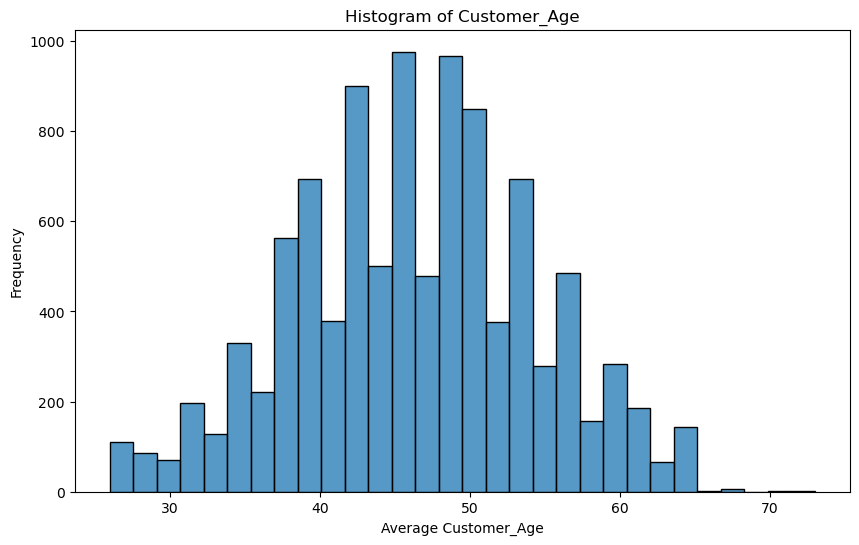

In [53]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Age'], bins=30)
plt.title('Histogram of Customer_Age')
plt.xlabel('Average Customer_Age')
plt.ylabel('Frequency')
plt.show()

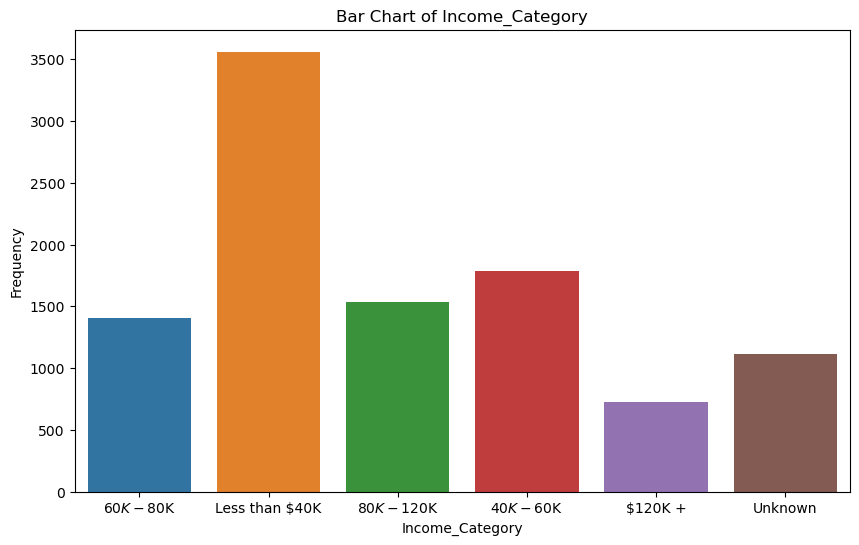

In [55]:
# Bar plot for 
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Income_Category'])
plt.title('Bar Chart of Income_Category')
plt.xlabel('Income_Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

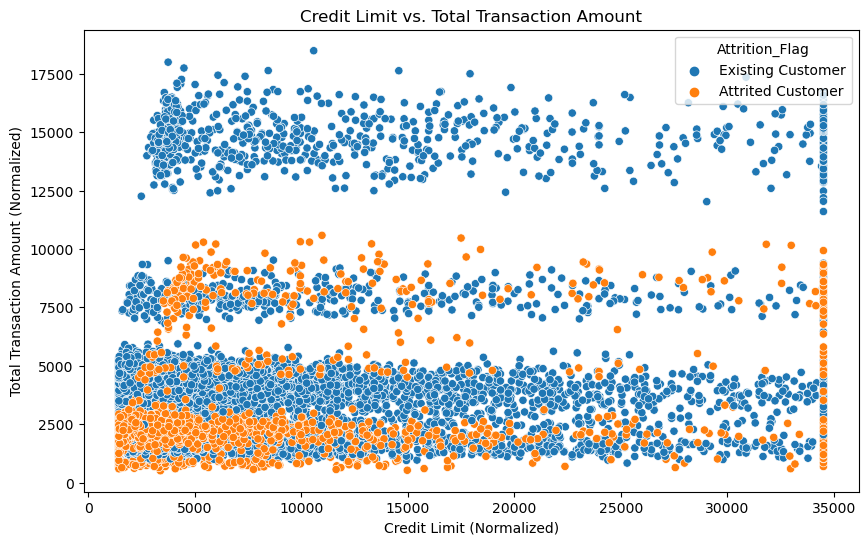

In [59]:
# Scatter plot (Total_Trans_Amt vs Credit_Limit)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Credit_Limit"], y=data["Total_Trans_Amt"], hue=data["Attrition_Flag"])
plt.title("Credit Limit vs. Total Transaction Amount")
plt.xlabel("Credit Limit (Normalized)")
plt.ylabel("Total Transaction Amount (Normalized)")
plt.show()

In [61]:
# Encode categorical variables
categorical_cols = ["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int32  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int32  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int32  
 6   Marital_Status            10127 non-null  int32  
 7   Income_Category           10127 non-null  int32  
 8   Card_Category             10127 non-null  int32  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [67]:
# Normalize numerical features
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [71]:
data.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,1.012700e+04,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,1.012700e+04,...,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,10127.000000,10127.000000,1.012700e+04,1.012700e+04
mean,2.385549e-17,0.839340,-2.806528e-18,0.470919,-5.332403e-17,3.096574,1.463415,2.863928,0.179816,4.209792e-17,...,2.806528e-17,5.613056e-18,2.245222e-17,-2.806528e-17,3.367834e-17,-1.683917e-17,0.000000,0.000000,-5.613056e-18,-1.122611e-17
std,1.000049e+00,0.367235,1.000049e+00,0.499178,1.000049e+00,1.834812,0.737808,1.504700,0.693039,1.000049e+00,...,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049,1.000049,1.000049e+00,1.000049e+00
min,-8.426523e-01,0.000000,-2.535541e+00,0.000000,-1.806378e+00,0.000000,0.000000,0.000000,0.000000,-2.871068e+00,...,-2.316674e+00,-2.219655e+00,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344,-2.337256,-2.991597e+00,-9.971550e-01
25%,-7.083861e-01,1.000000,-6.643815e-01,0.000000,-1.036462e+00,2.000000,1.000000,2.000000,0.000000,-6.171294e-01,...,-3.375979e-01,-4.116160e-01,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882438e-01,-0.661940,-0.846080,-5.469820e-01,-9.137243e-01
50%,-5.758840e-01,1.000000,-4.066159e-02,0.000000,-2.665471e-01,3.000000,1.000000,3.000000,0.000000,8.964513e-03,...,-3.375979e-01,-4.116160e-01,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-0.148688,0.091230,-4.293775e-02,-3.587287e-01
75%,9.204369e-01,1.000000,7.078024e-01,1.000000,5.033681e-01,5.000000,2.000000,4.000000,0.000000,5.098397e-01,...,6.519402e-01,4.924038e-01,2.679862e-01,7.622408e-01,2.629041e-01,4.519214e-01,0.099181,0.687701,4.443050e-01,8.274384e-01
max,2.416280e+00,1.000000,3.327426e+00,1.000000,2.043199e+00,6.000000,3.000000,5.000000,3.000000,2.513340e+00,...,3.620555e+00,3.204463e+00,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855,3.158792,1.260857e+01,2.626640e+00


In [77]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

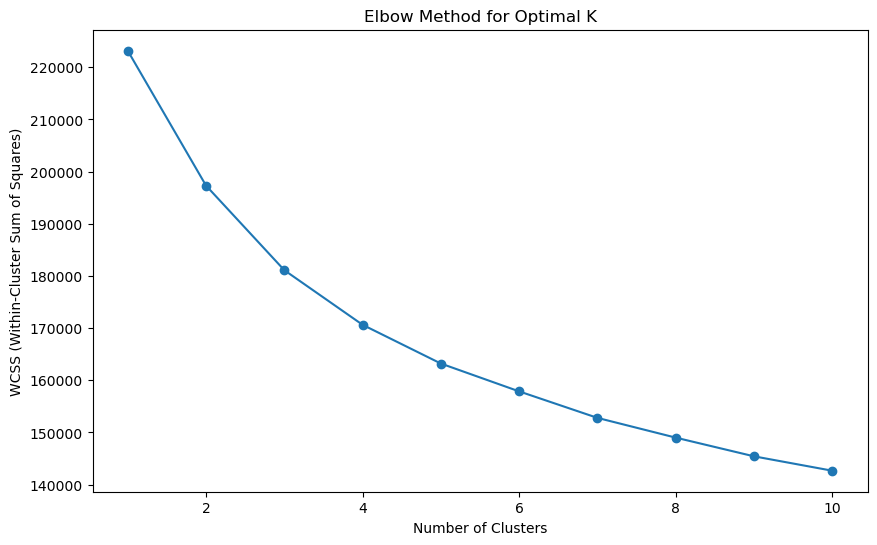

In [79]:
# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [83]:
# Fit K-Means with the optimal number of clusters (choosing k=4 based on the elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(data)

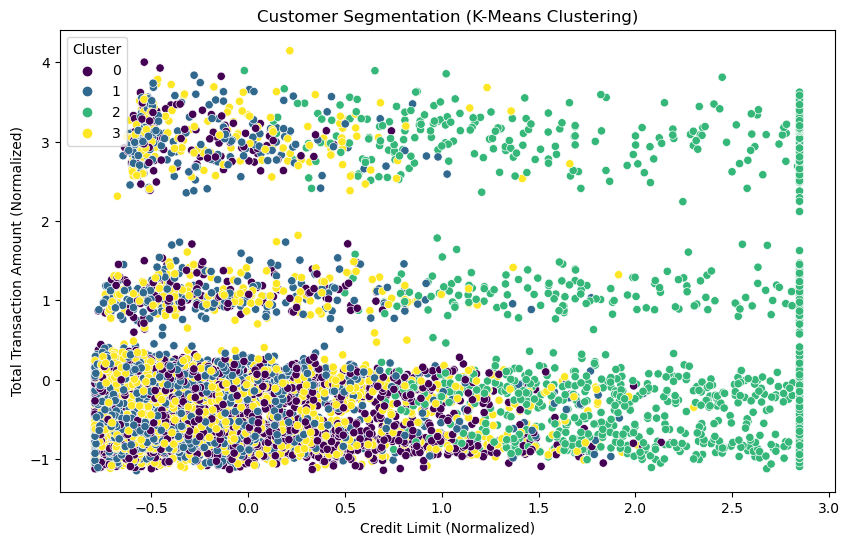

In [87]:
# Visualize the clusters (using two principal features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Credit_Limit"], y=data["Total_Trans_Amt"], hue=data["Cluster"], palette="viridis")
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Credit Limit (Normalized)")
plt.ylabel("Total Transaction Amount (Normalized)")
plt.show()